In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


# Data Understanding and Preparation

In [ ]:
df = pd.read_csv("/content/data.csv",encoding = 'latin-1')

In [ ]:
data = pd.read_csv("/content/data.csv",encoding = 'latin-1')

In [ ]:
 data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301296 entries, 0 to 301295
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    301296 non-null  object 
 1   StockCode    301296 non-null  object 
 2   Description  300186 non-null  object 
 3   Quantity     301295 non-null  float64
 4   InvoiceDate  301295 non-null  object 
 5   UnitPrice    301295 non-null  float64
 6   CustomerID   216796 non-null  float64
 7   Country      301295 non-null  object 
dtypes: float64(3), object(5)
memory usage: 18.4+ MB


In [ ]:
data.shape

(301296, 8)

In [ ]:
 data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,301296,301296,300186,301295.000000,301295,301295.000000,216796.000000,301295
unique,15498,3755,3764,NaN,13993,NaN,NaN,37
top,558475,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,6/29/2011 15:58,NaN,NaN,United Kingdom
freq,705,1562,1598,NaN,705,NaN,NaN,275774
mean,NaN,NaN,NaN,9.564842,NaN,4.951907,15279.453804,NaN
std,NaN,NaN,NaN,200.141068,NaN,115.968847,1730.020555,NaN
min,NaN,NaN,NaN,-74215.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13850.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.100000,15140.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16818.000000,NaN


# Handle missing values

In [ ]:
missing_values_before = data.isnull().sum()
print("Missing Values Before Handling:")
print(missing_values_before)


numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


for column in numerical_columns:
    if data[column].isnull().sum() > 0:
        print(f"Filling missing values in {column} with mean value")
        data[column] = data[column].fillna(data[column].mean())


for column in categorical_columns:
    if data[column].isnull().sum() > 0:
        print(f"Filling missing values in {column} with mode value")
        data[column] = data[column].fillna(data[column].mode()[0])


missing_values_after = data.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)


Missing Values Before Handling:
InvoiceNo          0
StockCode          0
Description     1110
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     84500
Country            1
dtype: int64
Filling missing values in Quantity with mean value
Filling missing values in UnitPrice with mean value
Filling missing values in CustomerID with mean value
Filling missing values in Description with mode value
Filling missing values in InvoiceDate with mode value
Filling missing values in Country with mode value

Missing Values After Handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
import pandas as pd

# Assuming 'processed_data' is your current DataFrame after cleaning steps
cleaned_data = data  # Replace 'processed_data' with your existing DataFrame

# Export to CSV
cleaned_data.to_csv('cleaned_data.csv', index=False)

print("Data has been successfully exported to 'cleaned_data.csv'")


Data has been successfully exported to 'cleaned_data.csv'


# Handle outliers


Outlier Summary Before Handling:
{'Quantity': 32416, 'UnitPrice': 24436, 'CustomerID': 0}


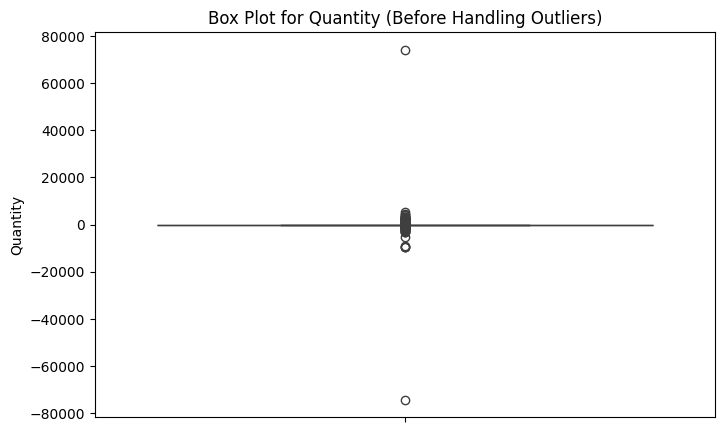

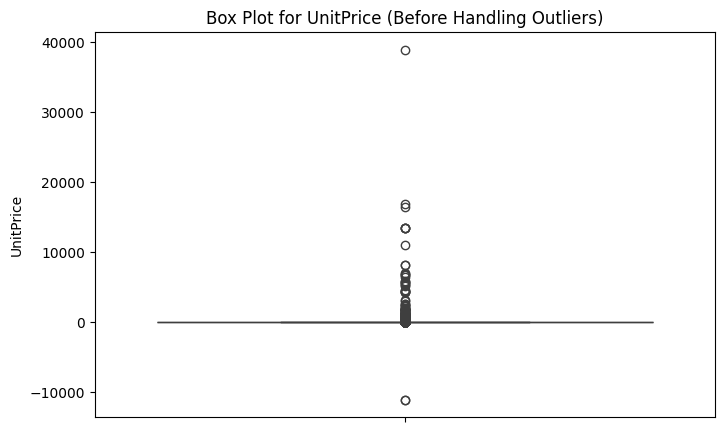

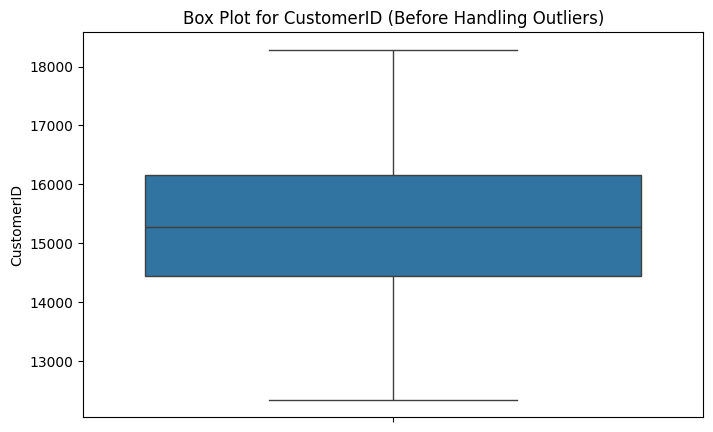


Outlier Summary After Handling:
{'Quantity': 0, 'UnitPrice': 0, 'CustomerID': 0}


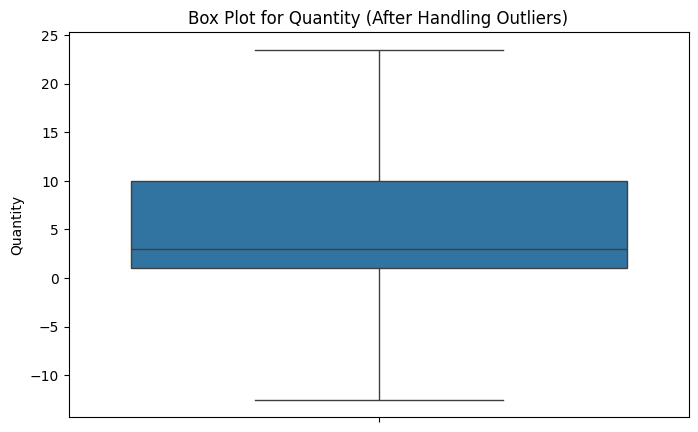

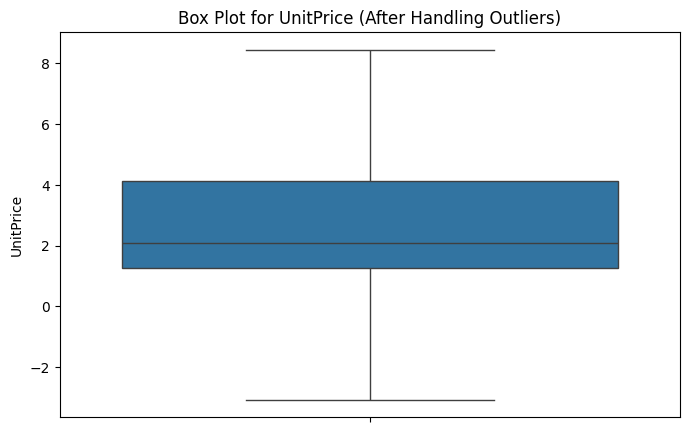

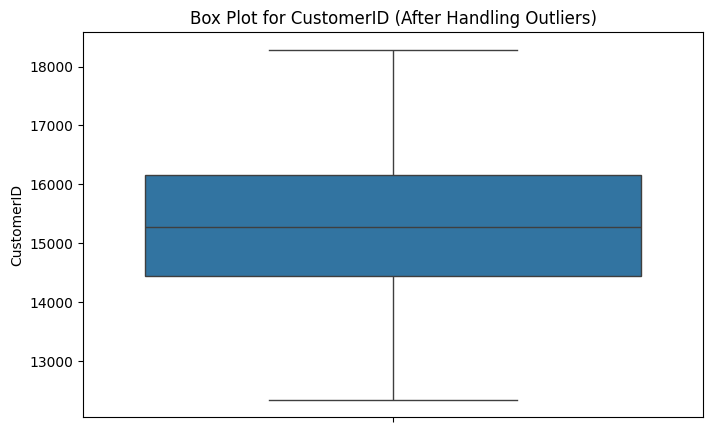

In [ ]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outlier_summary_before = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(data, column)
    outlier_summary_before[column] = len(outliers)
print("\nOutlier Summary Before Handling:")
print(outlier_summary_before)


for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[column])
    plt.title(f"Box Plot for {column} (Before Handling Outliers)")
    plt.show()


def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df


for column in numerical_columns:
    data = handle_outliers(data, column)


outlier_summary_after = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(data, column)
    outlier_summary_after[column] = len(outliers)
print("\nOutlier Summary After Handling:")
print(outlier_summary_after)


for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[column])
    plt.title(f"Box Plot for {column} (After Handling Outliers)")
    plt.show()


# Comparison of handling missing values and outliers

In [ ]:

print("\nComparison of Missing Values:")
missing_comparison = pd.DataFrame({
    'Before': missing_values_before,
    'After': missing_values_after
})
print(missing_comparison)


print("\nComparison of Outliers:")
outlier_comparison = pd.DataFrame({
    'Before': outlier_summary_before,
    'After': outlier_summary_after
})
print(outlier_comparison)



Comparison of Missing Values:
             Before  After
InvoiceNo         0      0
StockCode         0      0
Description    1110      0
Quantity          1      0
InvoiceDate       1      0
UnitPrice         1      0
CustomerID    84500      0
Country           1      0

Comparison of Outliers:
            Before  After
Quantity     32416      0
UnitPrice    24436      0
CustomerID       0      0


# Exploratory Data Analysis (EDA)

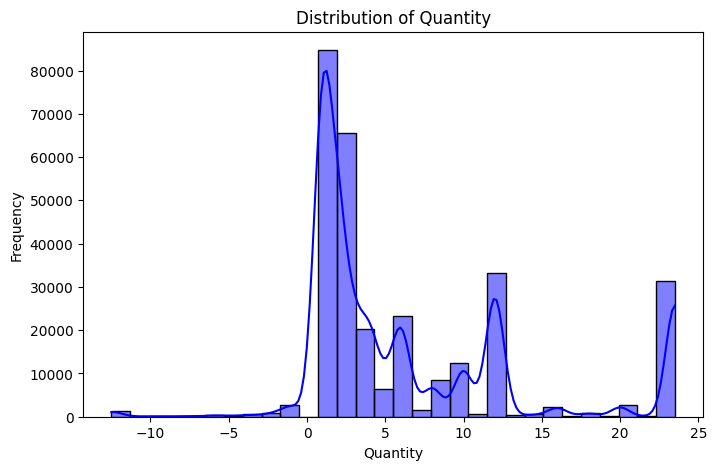

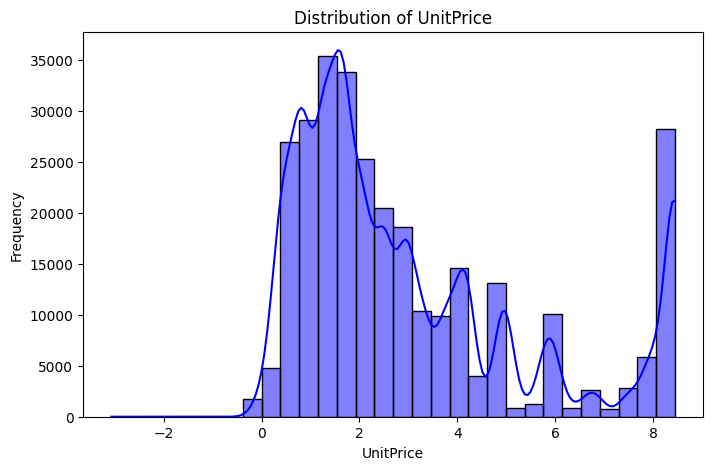

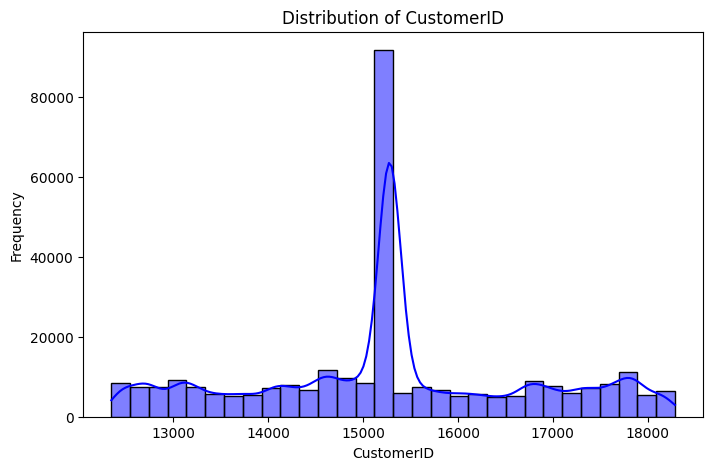

In [ ]:
# Visualize numerical feature distributions using histograms and KDE
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Visualize numerical feature distributions using box plots

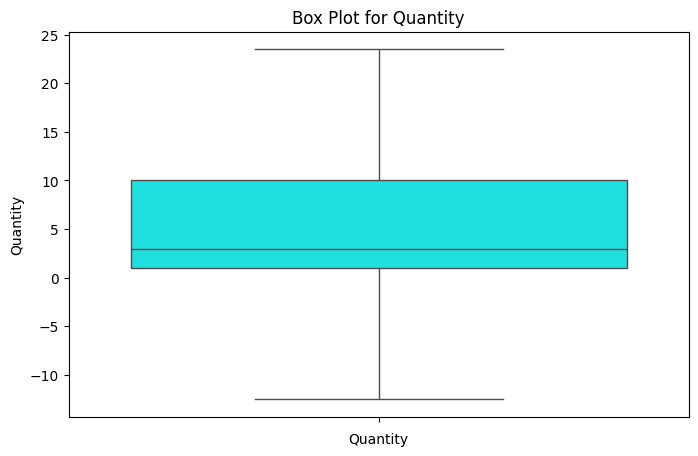

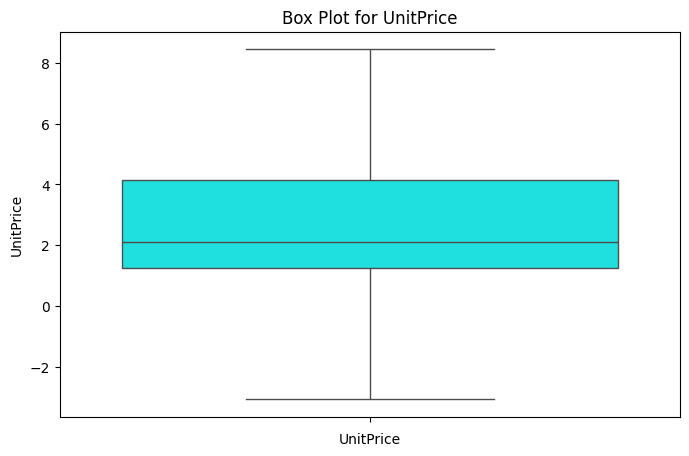

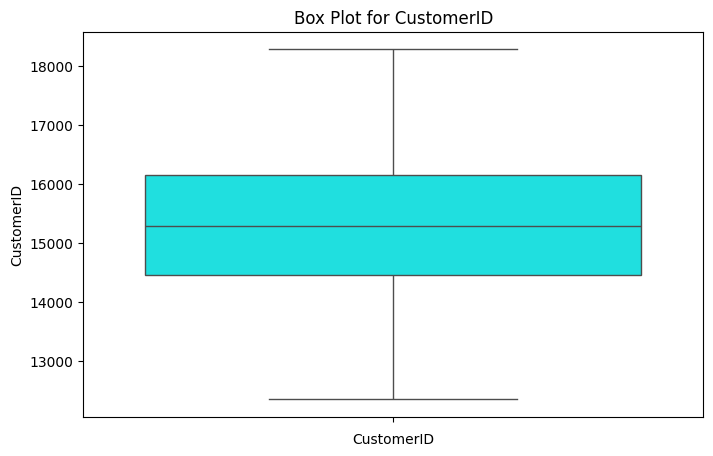

In [ ]:

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[column], color='cyan')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()


 Visualize pairwise relationships using pair plots

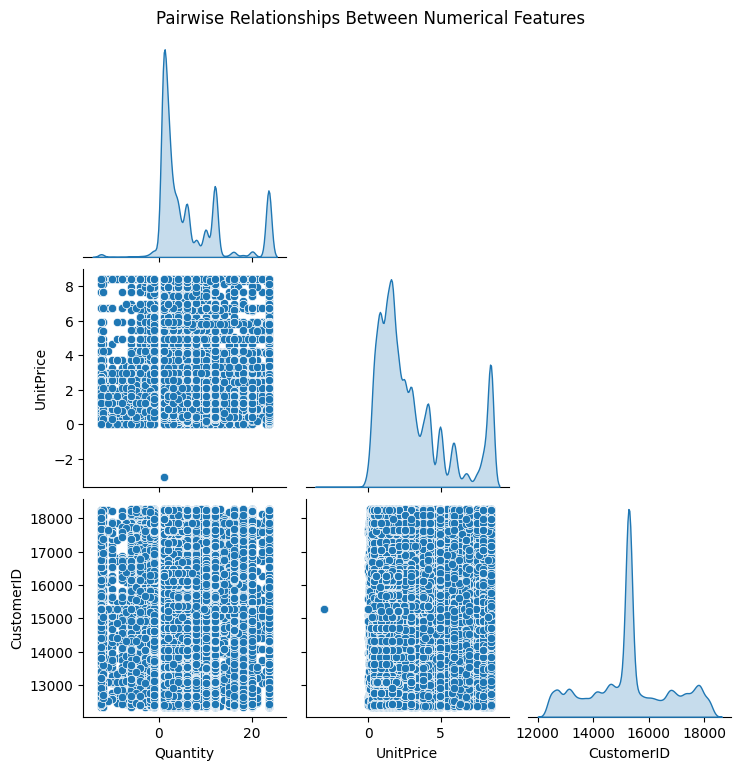

In [ ]:

sns.pairplot(data[numerical_columns], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()


 Visualize correlation between numerical features

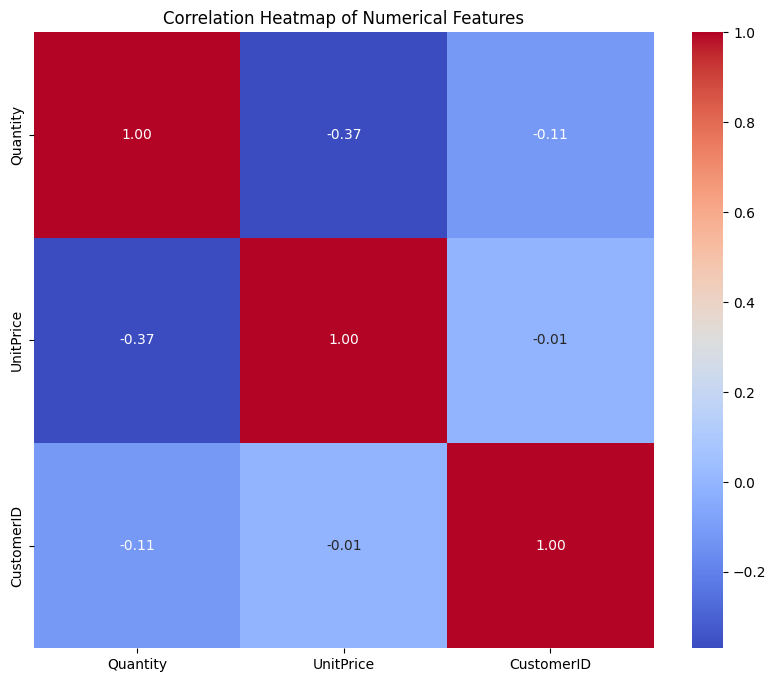

In [ ]:

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

if data['InvoiceDate'].isnull().any():
    print("There are invalid date values in the InvoiceDate column:")
    print(data[data['InvoiceDate'].isnull()])


Country-wise Customer Distribution

In [ ]:
print(data["Country"].value_counts().head())
print("Number of Unique Invoices:", data["InvoiceNo"].nunique())
print("First Invoice Date:", data['InvoiceDate'].iloc[0])

Country
United Kingdom    275775
Germany             5354
EIRE                4311
France              4239
Netherlands         1487
Name: count, dtype: int64
Number of Unique Invoices: 15498
First Invoice Date: 2010-12-01 08:26:00


In [ ]:
high_value_products = data.groupby("Description").agg({"UnitPrice": "max"}).sort_values("UnitPrice", ascending=False).head()
print("High-Value Products:\n", high_value_products)

High-Value Products:
                                     UnitPrice
Description                                  
PURPLE GEMSTONE NECKLACE 45CM            8.45
CHOCOLATE 1 WICK MORRIS BOX CANDLE       8.45
GLASS BELL JAR LARGE                     8.45
POMPOM CURTAIN                           8.45
PLASMATRONIC LAMP                        8.45


In [ ]:
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
top_products = data.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
print("High Revenue Generating Products:\n", top_products)

High Revenue Generating Products:
 Description
REGENCY CAKESTAND 3 TIER              60852.975
PARTY BUNTING                         47069.350
WHITE HANGING HEART T-LIGHT HOLDER    40488.810
JUMBO BAG RED RETROSPOT               26248.430
ASSORTED COLOUR BIRD ORNAMENT         20795.190
JAM MAKING SET WITH JARS              18956.015
SPOTTY BUNTING                        18708.150
CHILLI LIGHTS                         17853.655
SET OF 3 CAKE TINS PANTRY DESIGN      17004.950
LUNCH BAG RED RETROSPOT               16740.815
Name: TotalRevenue, dtype: float64


In [ ]:
total_quantity_sold = data.groupby("Description").agg({"Quantity": "sum"}).head()
print("Total Quantity Sold:\n", total_quantity_sold)

Total Quantity Sold:
                                  Quantity
Description                              
4 PURPLE FLOCK DINNER CANDLES        35.0
DOLLY GIRL BEAKER                   270.0
OVAL WALL MIRROR DIAMANTE           188.5
RED SPOT GIFT BAG LARGE              39.0
SET 2 TEA TOWELS I LOVE LONDON     1485.5



Analyze product popularity

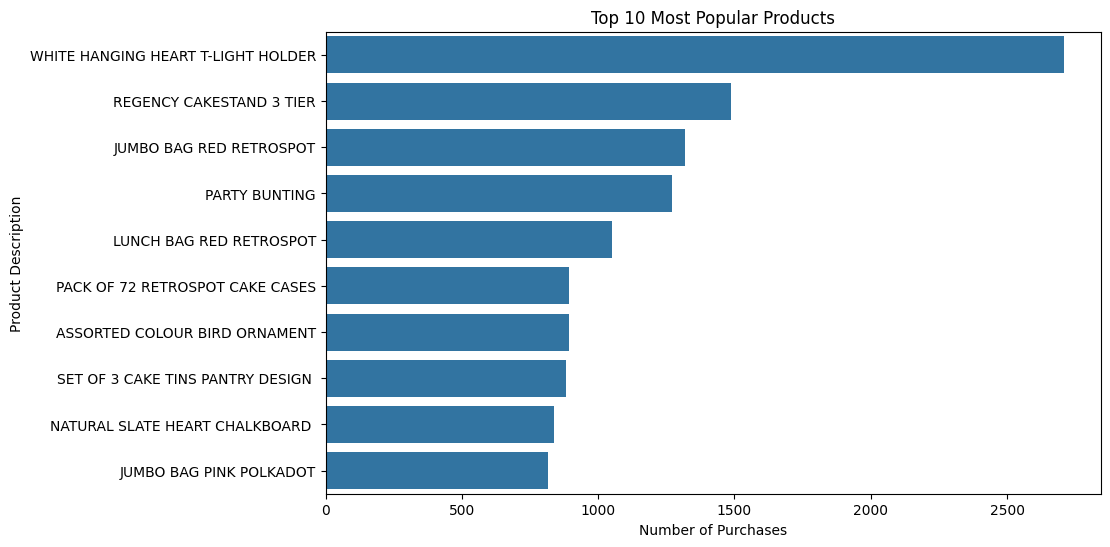

In [ ]:

product_popularity = data['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.values, y=product_popularity.index)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Description')
plt.show()

In [ ]:
customer_revenue = data.groupby('CustomerID')['TotalRevenue'].sum()
print("Total Revenue Per Customer:\n", customer_revenue.head())

Total Revenue Per Customer:
 CustomerID
12346.0      11.440
12347.0    2453.025
12348.0     445.560
12350.0     302.425
12352.0     520.480
Name: TotalRevenue, dtype: float64


In [ ]:
purchase_frequency = data.groupby('CustomerID')['InvoiceNo'].count()
print("Purchase Frequency Per Customer:\n", purchase_frequency.head())

Purchase Frequency Per Customer:
 CustomerID
12346.0      2
12347.0    124
12348.0     28
12350.0     17
12352.0     48
Name: InvoiceNo, dtype: int64


In [ ]:
average_order_value = customer_revenue / purchase_frequency
print("Average Order Value Per Customer:\n", average_order_value.head())

Average Order Value Per Customer:
 CustomerID
12346.0     5.720000
12347.0    19.782460
12348.0    15.912857
12350.0    17.789706
12352.0    10.843333
dtype: float64


Visualize customer revenue distribution

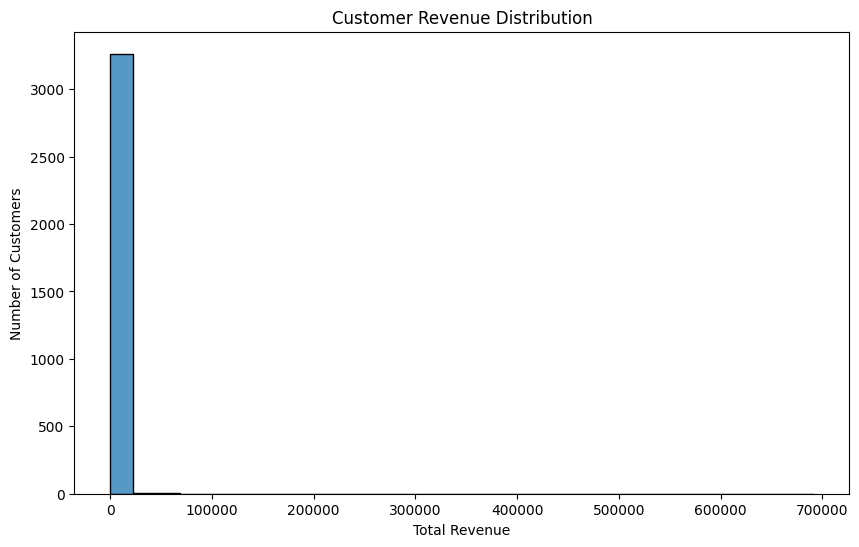

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue, bins=30)
plt.title('Customer Revenue Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Customers')
plt.show()



 Visualize purchase frequency distribution

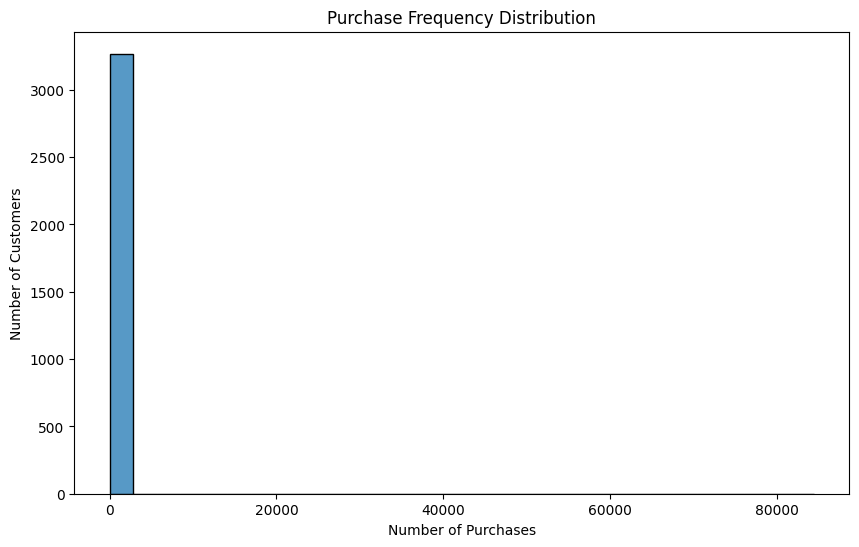

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, bins=30)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')
monthly_revenue = data.groupby('InvoiceMonth')['TotalRevenue'].sum()


 Visualize monthly revenue trends

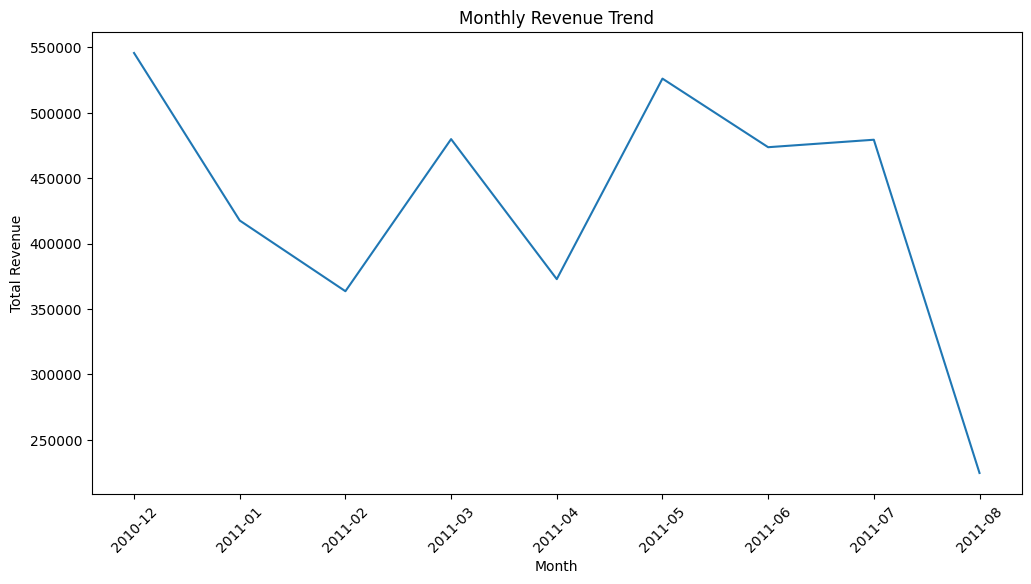

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



Analyze sales seasonality using monthly revenue data

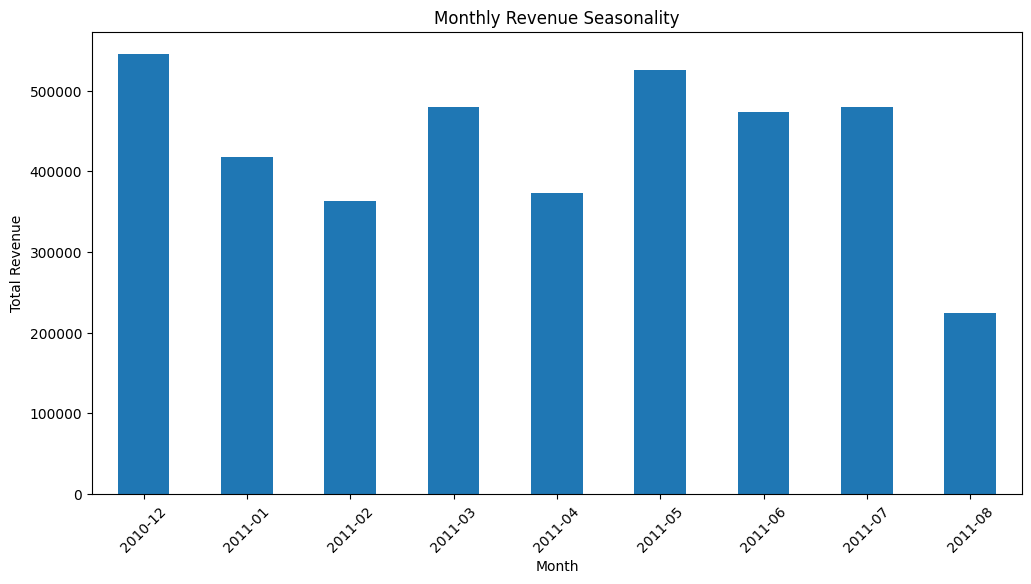

In [ ]:
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar')
plt.title('Monthly Revenue Seasonality')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

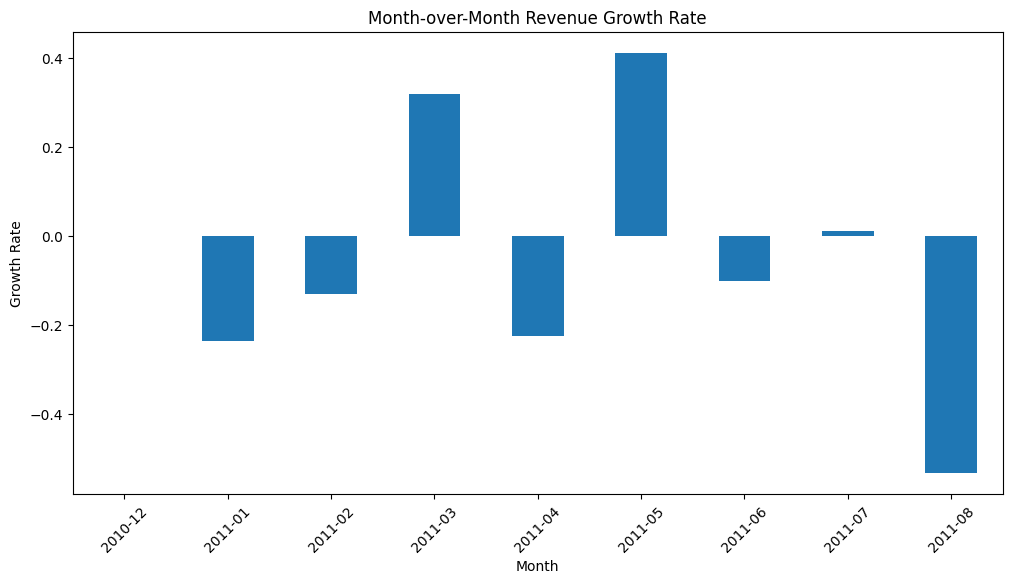

In [ ]:
monthly_revenue_growth = monthly_revenue.pct_change()
plt.figure(figsize=(12, 6))
monthly_revenue_growth.plot(kind='bar')
plt.title('Month-over-Month Revenue Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
country_sales = data.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)
print("Country-Wise Sales Distribution:\n", country_sales)

Country-Wise Sales Distribution:
 Country
United Kingdom          3.338062e+06
Germany                 1.020263e+05
EIRE                    9.118764e+04
France                  8.090212e+04
Netherlands             5.094621e+04
Australia               2.950619e+04
Switzerland             2.426947e+04
Spain                   2.378194e+04
Belgium                 1.908281e+04
Portugal                1.469222e+04
Norway                  1.061524e+04
Finland                 9.661120e+03
Japan                   9.564335e+03
Channel Islands         8.393220e+03
Italy                   7.423995e+03
Sweden                  7.185705e+03
Denmark                 7.147730e+03
Singapore               6.227760e+03
Cyprus                  6.222880e+03
Hong Kong               5.286530e+03
Austria                 4.839440e+03
Poland                  4.677655e+03
Greece                  3.621775e+03
Unspecified             2.845230e+03
Iceland                 2.453025e+03
Canada                  2.350835e

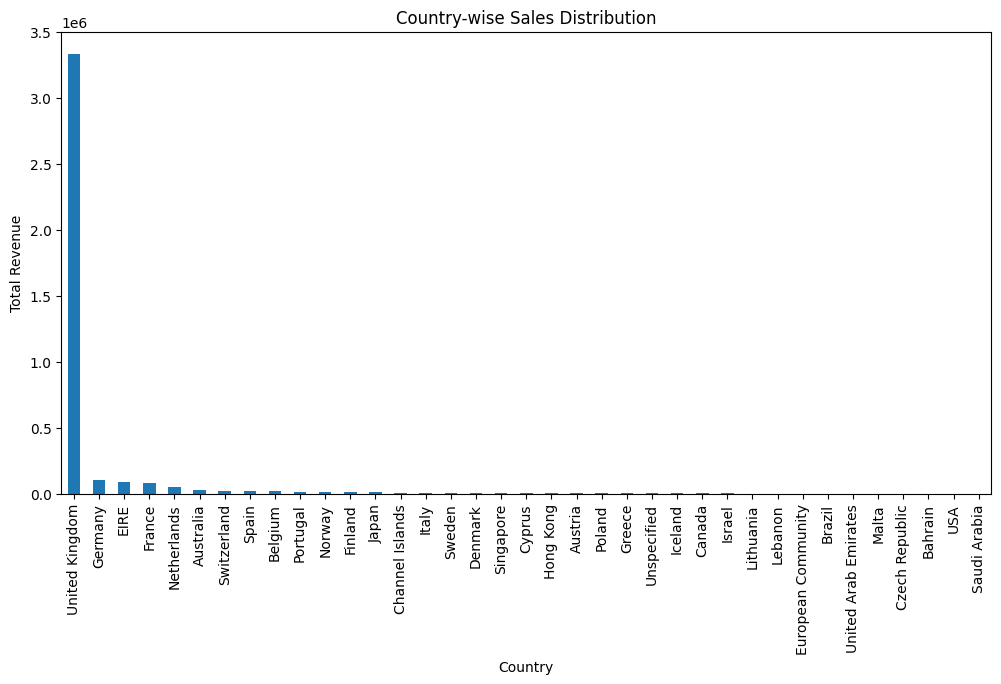

In [ ]:
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Country-wise Sales Distribution')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

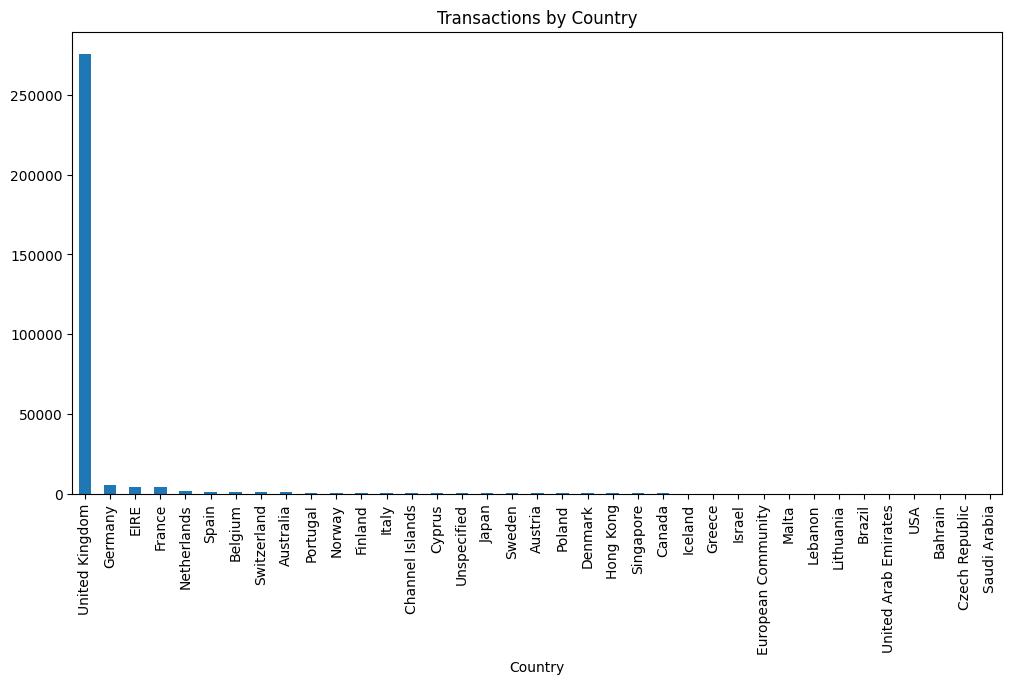

In [ ]:
country_counts = data['Country'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Transactions by Country')
plt.show()

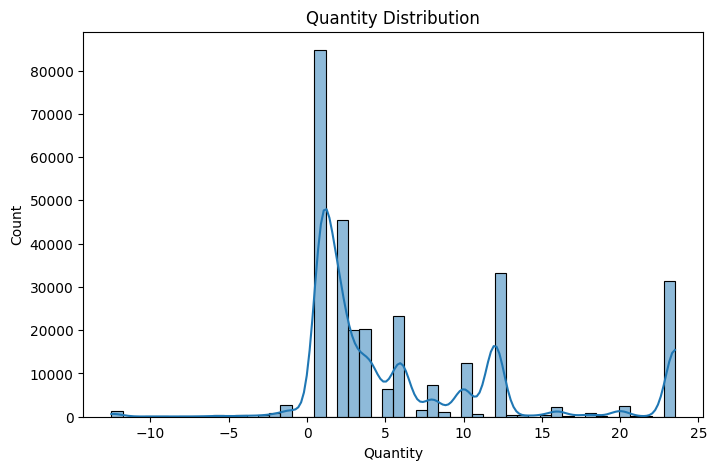

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Quantity'], bins=50, kde=True)
plt.title('Quantity Distribution')
plt.show()

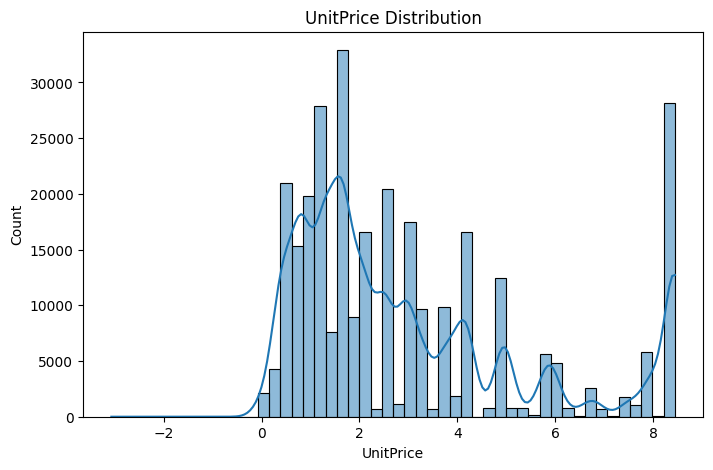

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['UnitPrice'], bins=50, kde=True)
plt.title('UnitPrice Distribution')
plt.show()

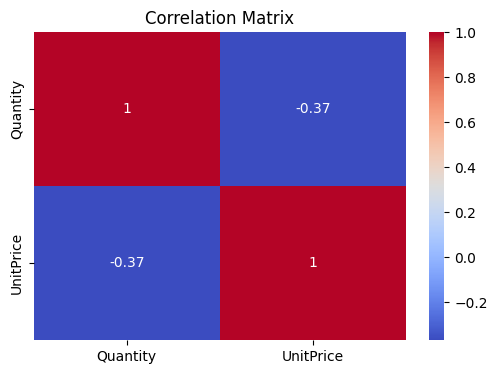

In [ ]:
corr_matrix = data[['Quantity', 'UnitPrice']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data_cleaned= data.dropna(subset=['Description'])

In [ ]:
data_cleaned = data.dropna(subset=['CustomerID'])

In [ ]:
print("Missing values after handling:")
print(data_cleaned.isnull().sum())

data_cleaned.to_csv('cleaned_data.csv', index=False)

Missing values after handling:
InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalRevenue    0
InvoiceMonth    0
dtype: int64


# Feature Engineering

Calculate RFM metrics

In [ ]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
reference_date = data_cleaned['InvoiceDate'].max()
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Quantity': lambda x: (x * data_cleaned.loc[x.index, 'UnitPrice']).sum()
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm['Monetary'] = rfm['Monetary'].clip(lower=0)

In [ ]:
customer_duration = data_cleaned.groupby('CustomerID').agg(
    first_purchase=('InvoiceDate', 'min'),
    last_purchase=('InvoiceDate', 'max')
)
customer_duration['PurchaseDuration'] = (
    customer_duration['last_purchase'] - customer_duration['first_purchase']
).dt.days
rfm = rfm.merge(customer_duration[['PurchaseDuration']], on='CustomerID', how='left')


data_cleaned['PreviousPurchaseDate'] = data_cleaned.groupby('CustomerID')['InvoiceDate'].shift(1)
data_cleaned['PurchaseInterval'] = (data_cleaned['InvoiceDate'] - data_cleaned['PreviousPurchaseDate']).dt.days
average_interval = data_cleaned.groupby('CustomerID')['PurchaseInterval'].mean().reset_index()
average_interval.columns = ['CustomerID', 'AvgPurchaseInterval']
rfm = rfm.merge(average_interval, on='CustomerID', how='left')

total_products = data_cleaned.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products.columns = ['CustomerID', 'TotalProducts']
rfm = rfm.merge(total_products, on='CustomerID', how='left')


Calculate RFM Scores

In [ ]:
quantiles = rfm.quantile(q=[0.25, 0.50, 0.75])

def RScore(x, p, d):
    if p == 'Recency':
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.50]:
            return 3
        elif x <= d[p][0.75]:
            return 2
        else:
            return 1
    else:
        if x <= d[p][0.25]:
            return 1
        elif x <= d[p][0.50]:
            return 2
        elif x <= d[p][0.75]:
            return 3
        else:
            return 4

rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency', quantiles))
rfm['F'] = rfm['Frequency'].apply(RScore, args=('Frequency', quantiles))
rfm['M'] = rfm['Monetary'].apply(RScore, args=('Monetary', quantiles))
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
def assign_segment(score):
    if score < 5:
        return 'Low Value'
    elif score < 9:
        return 'Mid Value'
    else:
        return 'High Value'

rfm['RFM_Segment_Label'] = rfm['RFM_Score'].apply(assign_segment)


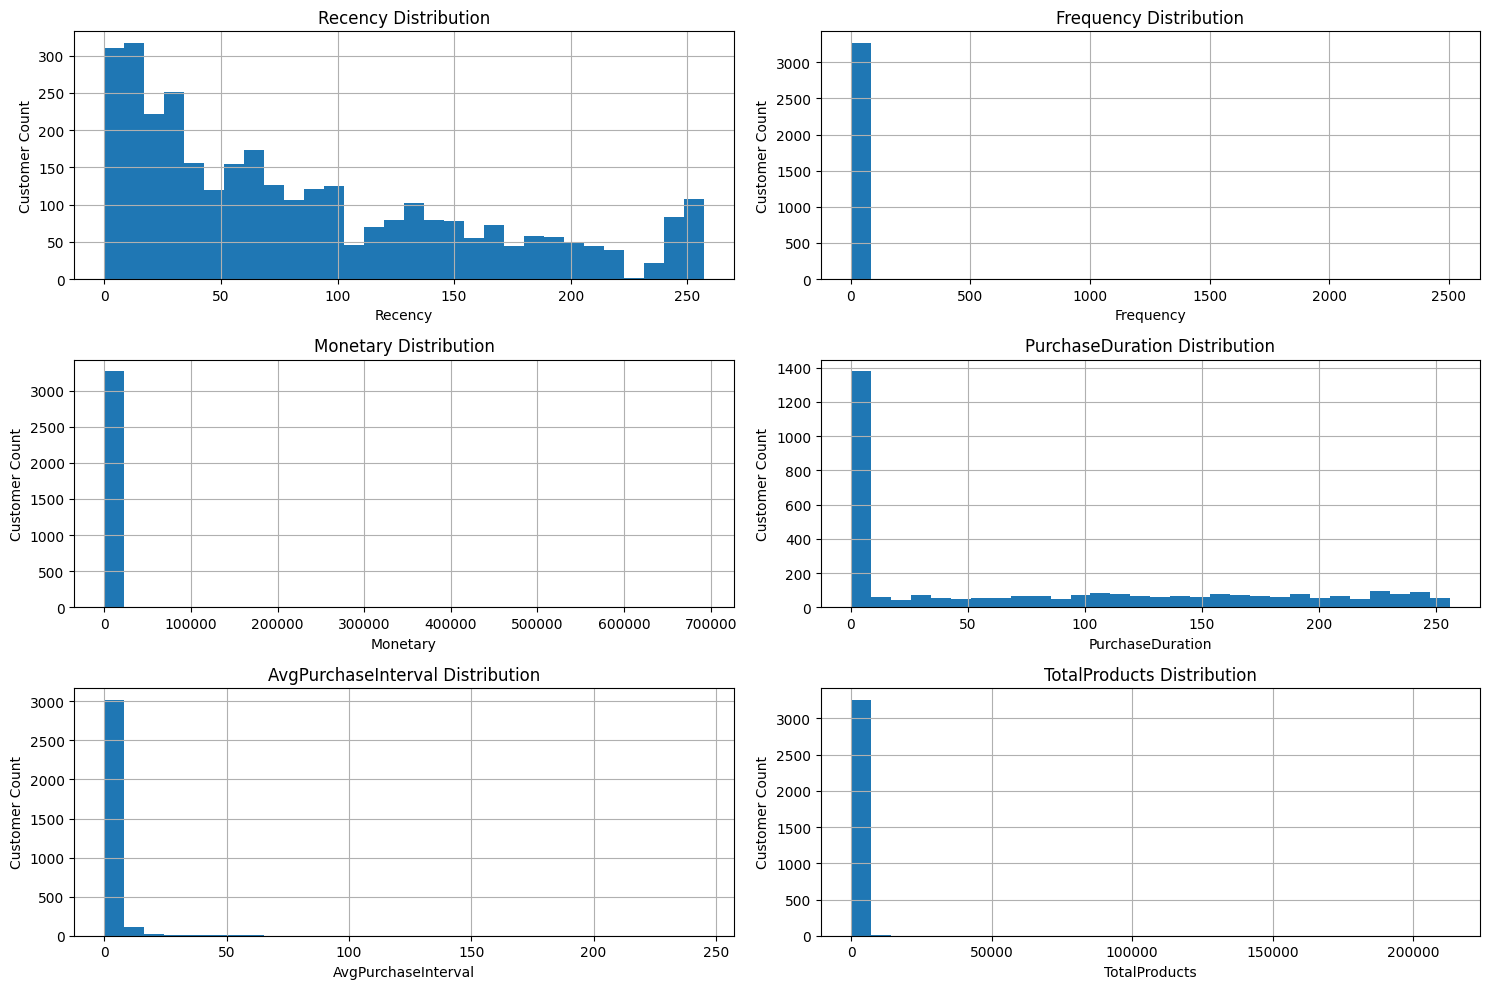

In [ ]:
metrics = ['Recency', 'Frequency', 'Monetary', 'PurchaseDuration', 'AvgPurchaseInterval', 'TotalProducts']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    rfm[metric].hist(bins=30)
    plt.title(f'{metric} Distribution')
    plt.xlabel(metric)
    plt.ylabel('Customer Count')

plt.tight_layout()
plt.show()


In [ ]:
segment_count = rfm['RFM_Segment_Label'].value_counts().reset_index()
segment_count.columns = ['RFM_Segment', 'Count']



 Visualize RFM Segments

In [ ]:
import plotly.express as px
fig = px.bar(segment_count, x='RFM_Segment', y='Count', color='RFM_Segment',
             title='Count of Customers by RFM Segment')
fig.show()

In [ ]:
rfm.to_csv('rfm_analysis.csv', index=False)


 Apply StandardScaler

In [ ]:
rfm_features = rfm[['Recency', 'Frequency', 'Monetary', 'PurchaseDuration', 'AvgPurchaseInterval', 'TotalProducts']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

rfm_features = rfm[['Recency', 'Frequency', 'Monetary', 'PurchaseDuration', 'AvgPurchaseInterval', 'TotalProducts']]
imputer = SimpleImputer(strategy='mean')
rfm_features_imputed = imputer.fit_transform(rfm_features)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features_imputed)


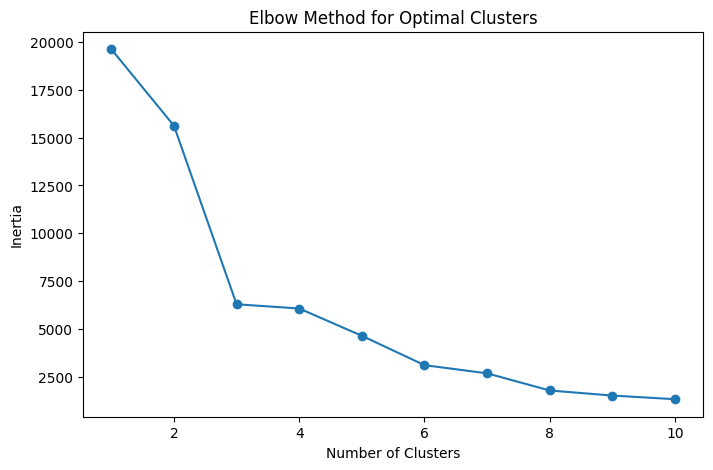

In [ ]:

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

 Fit K-Means with the optimal number of clusters

In [ ]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm['Cluster'].value_counts())

Cluster
0    1899
3    1355
2      15
1       1
Name: count, dtype: int64


In [ ]:
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(cluster_analysis)


   Cluster     Recency    Frequency       Monetary
0        0  122.936809     1.667720     377.374801
1        1    0.000000  2505.000000  691886.304205
2        2    6.600000    57.066667   23008.242333
3        3   34.259779     6.620664    1573.309450


In [ ]:
print("rfm shape:", rfm.shape)
print("rfm_scaled shape:", rfm_scaled.shape)


rfm shape: (3270, 14)
rfm_scaled shape: (3270, 6)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Elbow method and silhouette score

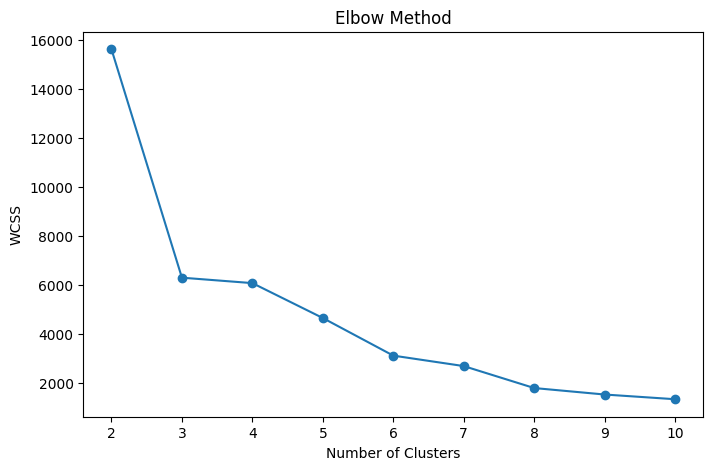

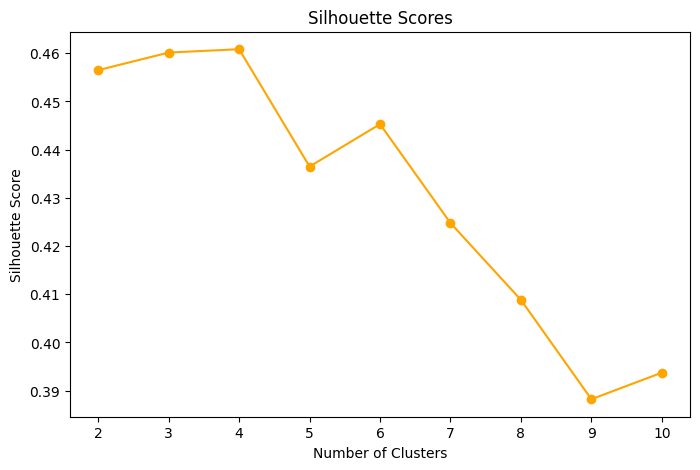

In [ ]:

wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


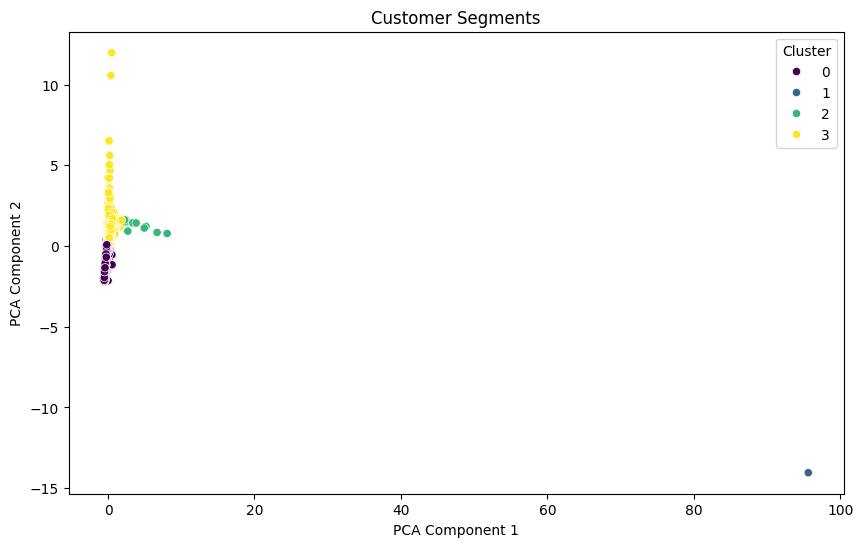

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


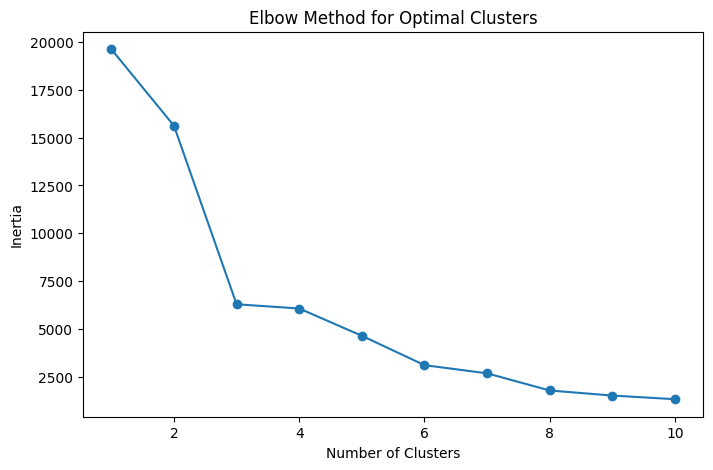

            Recency    Frequency       Monetary  Customer Count
Cluster                                                        
0        122.936809     1.667720     377.374801            1899
1          0.000000  2505.000000  691886.304205               1
2          6.600000    57.066667   23008.242333              15
3         34.259779     6.620664    1573.309450            1355


In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})

print(cluster_summary)


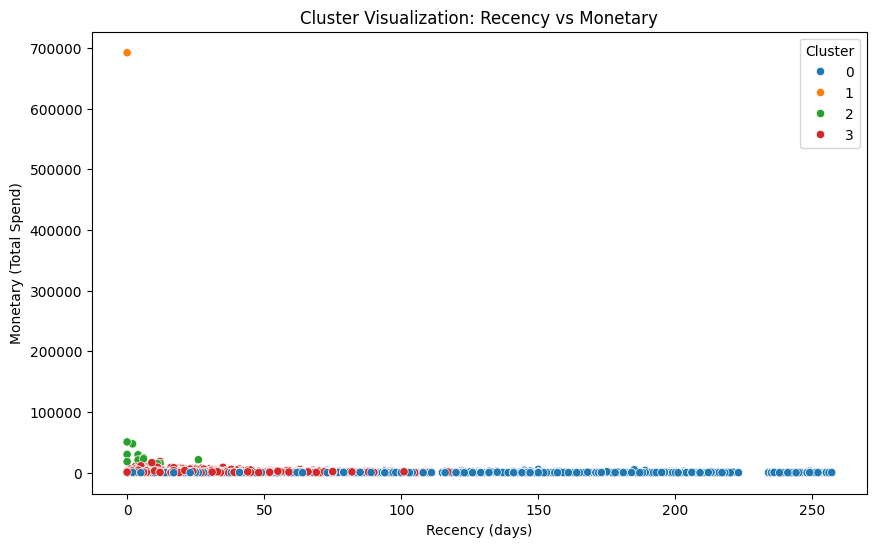

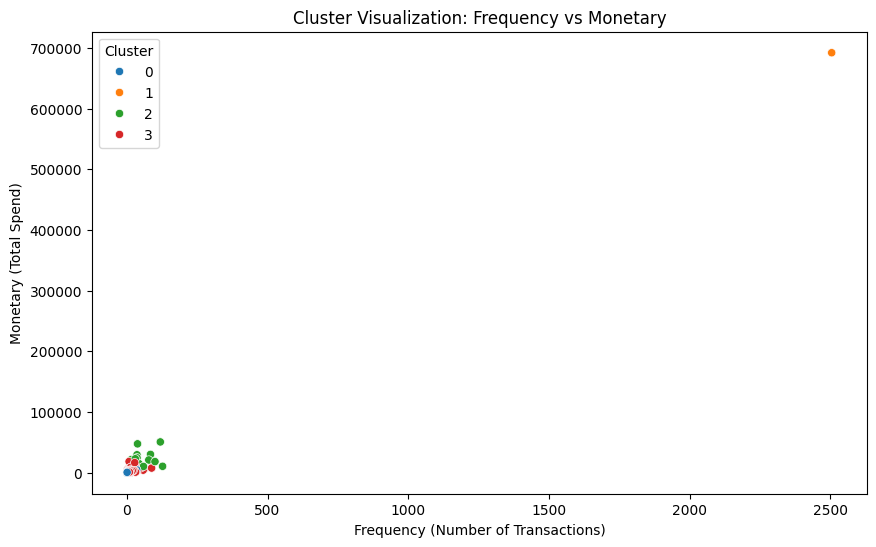

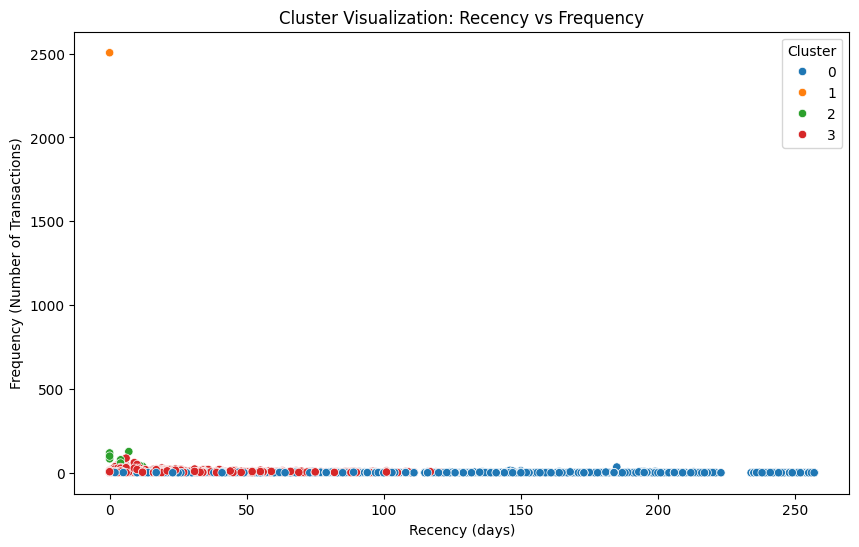

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='tab10')
plt.title('Cluster Visualization: Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (Total Spend)')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='tab10')
plt.title('Cluster Visualization: Frequency vs Monetary')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Monetary (Total Spend)')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Frequency'], hue=rfm['Cluster'], palette='tab10')
plt.title('Cluster Visualization: Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (Number of Transactions)')
plt.legend(title='Cluster')
plt.show()


In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage




# K-Means Clustering with silhouette score

K-Means Clustering:
Silhouette Score (K-Means): 0.4608293392999633


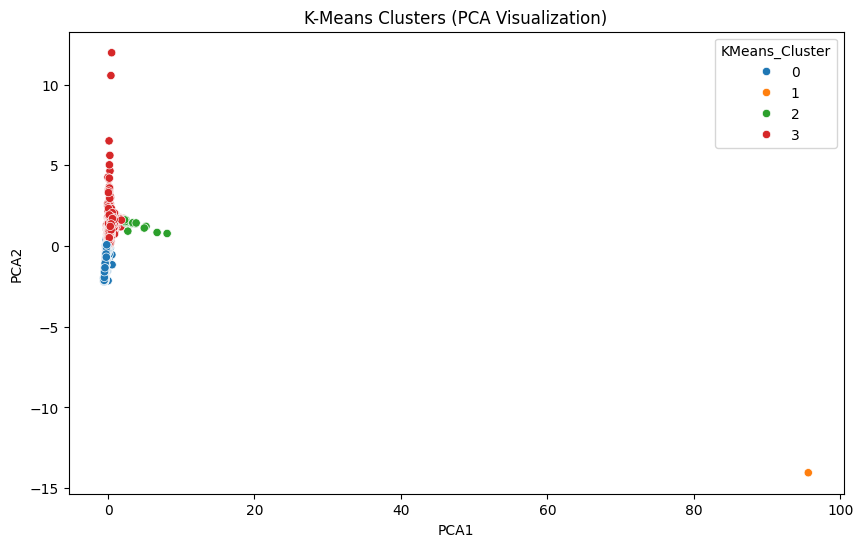

In [ ]:
print("K-Means Clustering:")
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

kmeans_silhouette = silhouette_score(rfm_scaled, rfm['KMeans_Cluster'])
print(f"Silhouette Score (K-Means): {kmeans_silhouette}")

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'], rfm['PCA2'] = rfm_pca[:, 0], rfm_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10')
plt.title('K-Means Clusters (PCA Visualization)')
plt.show()


# Agglomerative Clustering with silhouette score

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=4)
rfm['Hierarchical_Cluster'] = hierarchical.fit_predict(rfm_scaled)
hierarchical_silhouette = silhouette_score(rfm_scaled, rfm['Hierarchical_Cluster'])
print(f"Silhouette Score (Hierarchical): {hierarchical_silhouette}")


Silhouette Score (Hierarchical): 0.4243526633566431


# DBSCAN Clustering with silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

best_eps = None
best_min_samples = None
best_score = -1

for eps in np.arange(0.5, 2.0, 0.1):
    for min_samples in range(3, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(rfm_scaled)

        cluster_labels = labels[labels != -1]
        cluster_data = rfm_scaled[labels != -1]

        if len(np.unique(cluster_labels)) > 1:
            score = silhouette_score(cluster_data, cluster_labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best EPS: {best_eps}, Best Min Samples: {best_min_samples}, Best Silhouette Score: {best_score}")


Best EPS: 1.1999999999999997, Best Min Samples: 3, Best Silhouette Score: 0.8265439680022408


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
assert rfm_scaled.shape[0] == rfm.shape[0]


# K-means Clustering with silhouette score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

silhouette_scores = []
wcss = []

for k in range(2, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_temp.fit_predict(rfm_scaled)
    wcss.append(kmeans_temp.inertia_)
    silhouette_avg = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")


Silhouette Score for k=2: 0.9852488080266187
Silhouette Score for k=3: 0.6421524629584406
Silhouette Score for k=4: 0.5646563540958016
Silhouette Score for k=5: 0.5458516499383499
Silhouette Score for k=6: 0.48345099307779527
Silhouette Score for k=7: 0.5026523041311273
Silhouette Score for k=8: 0.5037303656580439
Silhouette Score for k=9: 0.5108209091190308



# Plotting Silhouette Scores and Elbow Curve

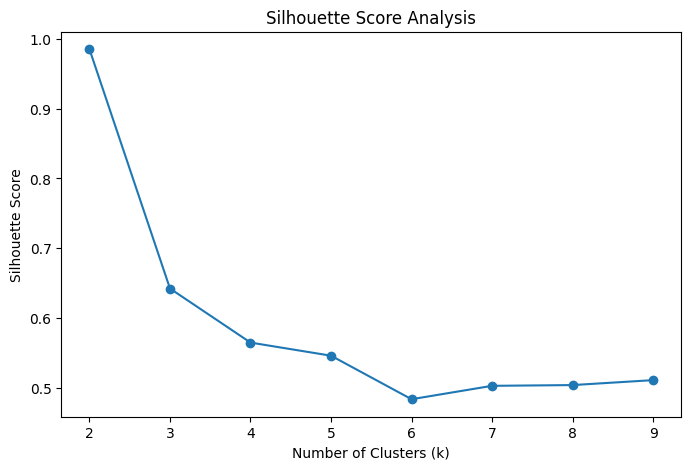

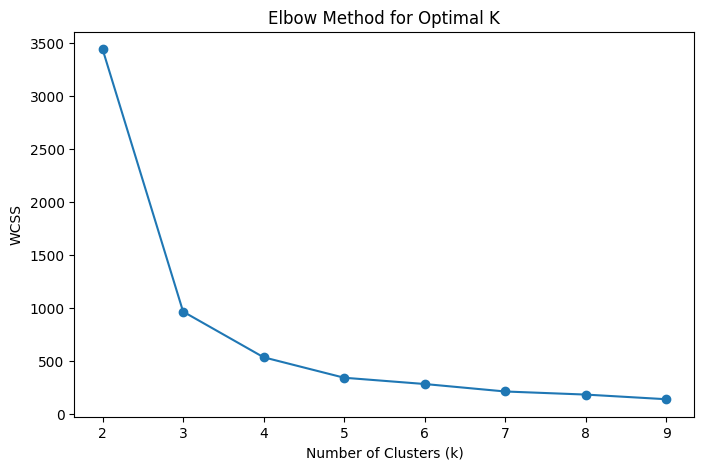

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()



# Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

for column in ['Recency', 'Frequency', 'Monetary']:
    rfm = handle_outliers(rfm, column)

rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print("\nCluster Counts:")
print(rfm['Cluster'].value_counts())

cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("\nCluster Analysis:")
print(cluster_analysis)



Cluster Counts:
Cluster
0    953
4    780
3    589
2    477
1    471
Name: count, dtype: int64

Cluster Analysis:
   Cluster     Recency  Frequency     Monetary
0        0   40.081847   1.974816   380.464676
1        1   23.866242   7.836518  2068.920792
2        2  220.048218   1.408805   263.346512
3        3   44.988115   4.718166  1118.771556
4        4  127.023077   1.571795   334.734154


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def dunn_index(data, labels):
    """
    Compute the Dunn Index for clustering.
    """
    if data.shape[0] != len(labels):
        raise ValueError("Data and labels must have the same number of rows.")

    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return 0

    inter_cluster_distances = []
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_cluster_distances.append(
                np.min(pairwise_distances(cluster_i, cluster_j))
            )

    intra_cluster_distances = []
    for label in unique_labels:
        cluster = data[labels == label]
        intra_cluster_distances.append(
            np.max(pairwise_distances(cluster, cluster))
        )

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)


aligned_data = rfm_scaled
cluster_labels = rfm['Cluster'].values

try:

    dunn_kmeans = dunn_index(aligned_data, cluster_labels)
    silhouette_avg = silhouette_score(aligned_data, cluster_labels)
    ch_score = calinski_harabasz_score(aligned_data, cluster_labels)
    db_score = davies_bouldin_score(aligned_data, cluster_labels)


    print(f"Dunn Index for KMeans: {dunn_kmeans}")
    print(f"Silhouette Score for KMeans: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {ch_score}")
    print(f"Davies-Bouldin Index: {db_score}")

except ValueError as e:
    print(f"Error: {e}")


Dunn Index for KMeans: 0.003334437195374249
Silhouette Score for KMeans: 0.3676589377662979
Calinski-Harabasz Index: 3692.4741734090017
Davies-Bouldin Index: 0.9344261940295366


#Visualize Clusters with PCA

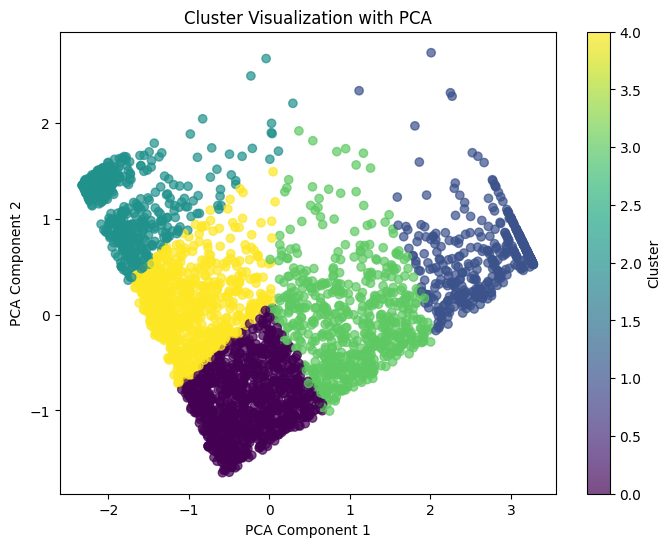

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

aligned_scaled_data = rfm_scaled
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(aligned_scaled_data)

assert len(rfm_pca) == len(rfm['Cluster']), "Mismatched dimensions between PCA data and cluster labels."
plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()



# Dunn Index for DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(rfm_scaled)

print("Cluster counts for DBSCAN:", np.unique(dbscan_labels, return_counts=True))
dunn_dbscan = dunn_index(rfm_scaled, dbscan_labels)
print("Dunn Index for DBSCAN:", dunn_dbscan)


Cluster counts for DBSCAN: (array([-1,  0]), array([  35, 3235]))
Dunn Index for DBSCAN: 0.031605478394495116


#Dunn Index for Hierarchical Clustering

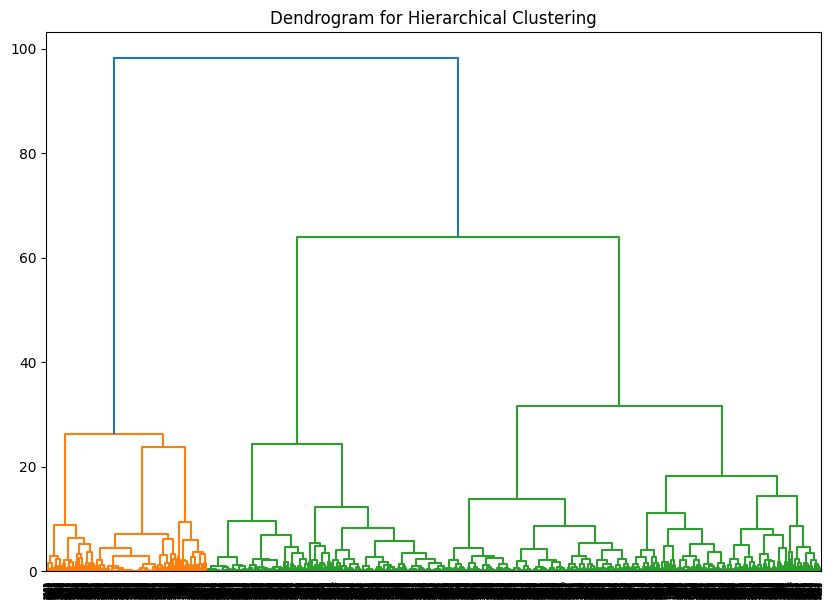

Dunn Index for Hierarchical Clustering: 0.011493606675730735


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_matrix = linkage(rfm_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

hierarchical_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')
dunn_hierarchical = dunn_index(rfm_scaled, hierarchical_labels)
print("Dunn Index for Hierarchical Clustering:", dunn_hierarchical)


# Visualize cluster distribution

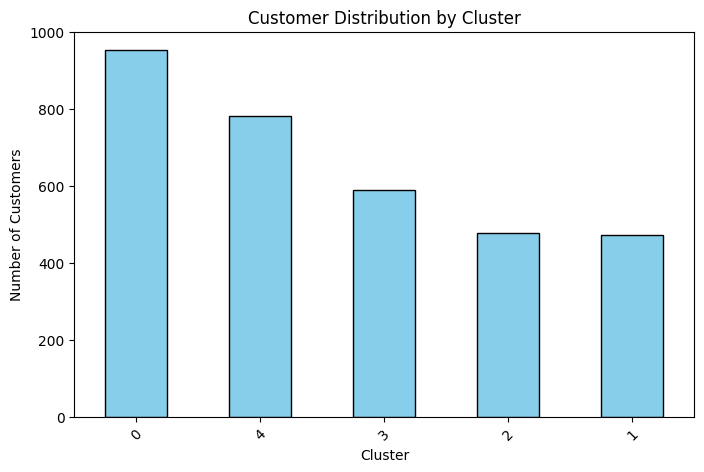

In [ ]:
cluster_distribution = rfm['Cluster'].value_counts()
plt.figure(figsize=(8, 5))
cluster_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
rfm['Avg_Purchase_Interval'] = rfm['Recency'] / rfm['Frequency']
print(rfm[['Avg_Purchase_Interval']].describe())


       Avg_Purchase_Interval
count            3270.000000
mean               61.035335
std                72.245301
min                 0.000000
25%                 6.500000
50%                27.000000
75%                95.000000
max               257.000000


In [ ]:
rfm['CLV'] = rfm['Frequency'] * rfm['Monetary']
print(rfm[['CLV']].describe())

                CLV
count   3270.000000
mean    3664.507414
std     5657.992938
min        0.000000
25%      244.245000
50%      889.872500
75%     4167.308750
max    19513.349063


In [ ]:
cluster_map = {
    0: 'Engaged Mid-Spenders',
    1: 'Dormant Low-Spenders',
    2: 'VIPs',
    3: 'Ultra VIPs'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_map)
print(rfm[['CustomerID', 'Cluster', 'Segment']].head())


   CustomerID  Cluster               Segment
0     12346.0        2                  VIPs
1     12347.0        1  Dormant Low-Spenders
2     12348.0        4                   NaN
3     12350.0        2                  VIPs
4     12352.0        3            Ultra VIPs


In [ ]:
rfm_df = rfm.copy()

#Elbow method and Silhouette Score for KMeans

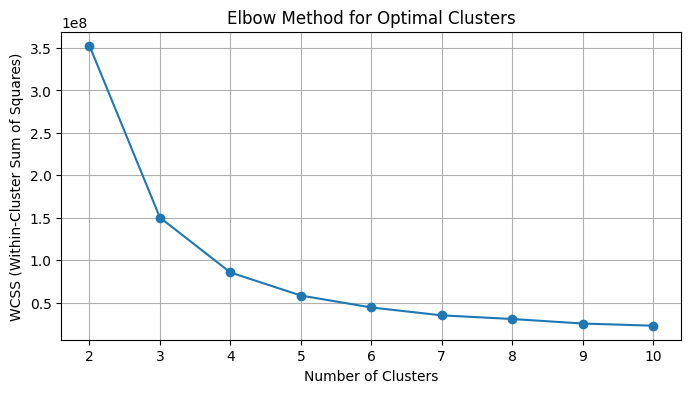

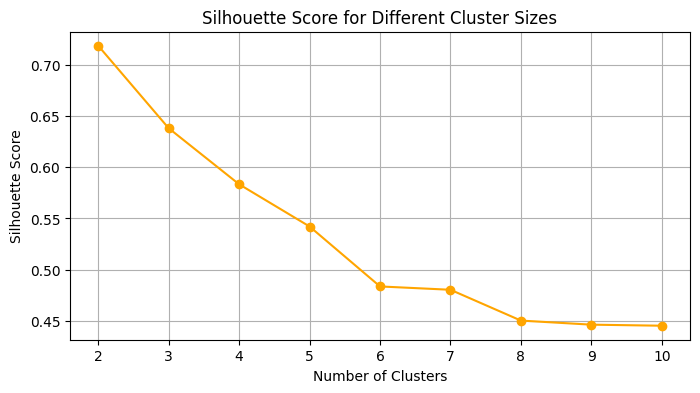

Silhouette Score for KMeans with 4 clusters: 0.58


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

rfm_df = rfm.copy()

pca = PCA(n_components=3)
rfm_pca = pca.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2', 'PC3'])

wcss = []
silhouette_scores = []
range_clusters = range(2, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(rfm_pca)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(rfm_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(rfm_pca)

rfm_df['Cluster'] = cluster_labels
final_sil_score = silhouette_score(rfm_pca, cluster_labels)
print(f'Silhouette Score for KMeans with {optimal_clusters} clusters: {final_sil_score:.2f}')


#Silhouette Score in DBSCAN

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

best_score = -1
best_params = {}
aligned_scaled_data = rfm_scaled
for eps in np.arange(0.3, 1.0, 0.1):
    for min_samples in range(3, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(aligned_scaled_data)
        if len(set(labels)) > 1:
            score = silhouette_score(aligned_scaled_data, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
print(f"Best Silhouette Score: {best_score:.2f} with params: {best_params}")


Best Silhouette Score: 0.38 with params: {'eps': 0.9000000000000001, 'min_samples': 8}


In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(rfm_pca)
agglo_score = silhouette_score(rfm_pca, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering: {agglo_score:.2f}")


Silhouette Score for Agglomerative Clustering: 0.71


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

wcss = []
silhouette_scores = []
range_clusters = range(2, 6)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))
optimal_clusters = range_clusters[np.argmax(silhouette_scores)]

final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = final_kmeans.fit_predict(rfm_scaled)

rfm['Cluster'] = cluster_labels
final_sil_score = silhouette_score(rfm_scaled, cluster_labels)
print(f"Optimal number of clusters: {optimal_clusters}")
print(f"Final Silhouette Score: {final_sil_score:.4f}")


Optimal number of clusters: 2
Final Silhouette Score: 0.4961


# Cluster Interpretation

In [ ]:
print("\nCluster Characteristics (K-Means):")
kmeans_summary = rfm.groupby('KMeans_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})
print(kmeans_summary)

print("\nCluster Characteristics (Hierarchical):")
hierarchical_summary = rfm.groupby('Hierarchical_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})
print(hierarchical_summary)


Cluster Characteristics (K-Means):
                   Recency  Frequency     Monetary  Customer Count
KMeans_Cluster                                                    
0               122.936809   1.644813   368.440218            1899
1                 0.000000   8.500000  2295.688125               1
2                 6.600000   8.500000  2295.688125              15
3                34.259779   5.159041  1214.989607            1355

Cluster Characteristics (Hierarchical):
                         Recency  Frequency     Monetary  Customer Count
Hierarchical_Cluster                                                    
0                     109.423765   2.043015   460.114108            2348
1                      24.723947   5.982816  1438.391383             902
2                      39.473684   2.526316   138.803158              19
3                       0.000000   8.500000  2295.688125               1


# Visualize DBSCAN clusters using PCA

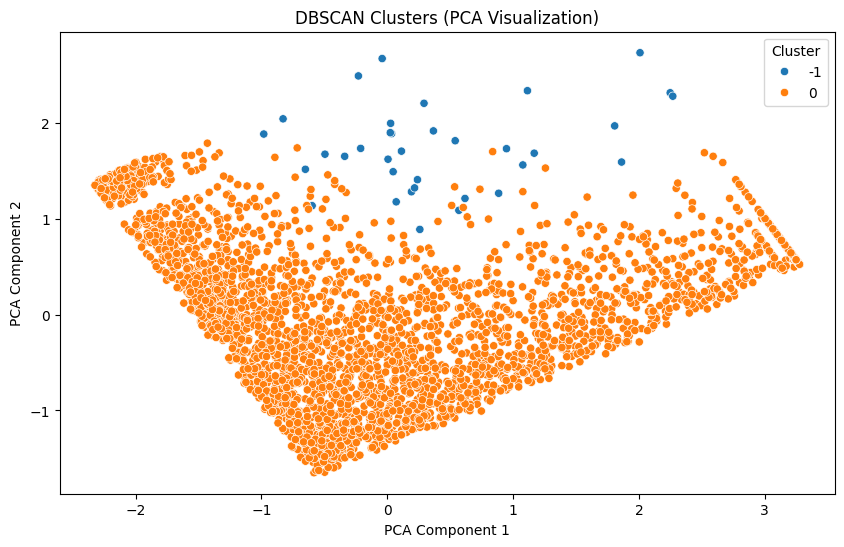

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

rfm_cleaned = rfm.iloc[:len(rfm_scaled)].reset_index(drop=True)

pca = PCA(n_components=2, random_state=42)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm_cleaned['PCA1'], rfm_cleaned['PCA2'] = rfm_pca[:, 0], rfm_pca[:, 1]
rfm_cleaned['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_cleaned,
    x='PCA1',
    y='PCA2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    legend='full'
)
plt.title('DBSCAN Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

# Accuracy and Classification Report of Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X = rfm[['Recency', 'Frequency']]
y = np.where(rfm['Monetary'] > rfm['Monetary'].median(), 1, 0)
noise_factor = 0.5
X += np.random.normal(0, noise_factor, X.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
logreg = LogisticRegression(max_iter=500, C=0.3, random_state=42)
logreg.fit(X_train, y_train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_scaled, y, cv=cv, scoring='accuracy')
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"\nCross-Validated Accuracy (Logistic Regression): {cv_scores.mean():.4f}")
print(f"\nAccuracy on Test Set (Logistic Regression): {accuracy_logreg:.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))



Cross-Validated Accuracy (Logistic Regression): 0.7976

Accuracy on Test Set (Logistic Regression): 0.7870

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       491
           1       0.84      0.71      0.77       490

    accuracy                           0.79       981
   macro avg       0.79      0.79      0.79       981
weighted avg       0.79      0.79      0.79       981



# Accuracy and Classification Report of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = rfm[['Recency', 'Frequency']]
y = np.where(rfm['Monetary'] > rfm['Monetary'].median(), 1, 0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform'],
    'metric': ['manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.4f}")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))
print("\nBest Parameters for KNN:")
print(grid_search.best_params_)


Accuracy (KNN): 0.8012

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       491
           1       0.83      0.76      0.79       490

    accuracy                           0.80       981
   macro avg       0.80      0.80      0.80       981
weighted avg       0.80      0.80      0.80       981


Best Parameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


# Accuracy and Classification Report of SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']]
y = np.where(rfm['Monetary'] > rfm['Monetary'].median(), 1, 0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
svm_model = SVC(kernel='linear', C=0.01, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM with Clusters): {accuracy_svm:.4f}")
print("\nClassification Report (SVM with Clusters):")
print(classification_report(y_test, y_pred_svm))


Accuracy (SVM with Clusters): 0.9317

Classification Report (SVM with Clusters):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       491
           1       1.00      0.87      0.93       490

    accuracy                           0.93       981
   macro avg       0.94      0.93      0.93       981
weighted avg       0.94      0.93      0.93       981



# Accuracy and Classification Report of Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

X = np.hstack((rfm_scaled, rfm[['Cluster']].values))
y = np.where(rfm['Monetary'] > rfm['Monetary'].median(), 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy = np.mean(cv_scores)
y_pred_nb = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Cross-Validated Accuracy (Naive Bayes): {cv_accuracy:.4f}")
print(f"Accuracy on Test Set (Naive Bayes): {test_accuracy:.4f}")
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Cross-Validated Accuracy (Naive Bayes): 0.9157
Accuracy on Test Set (Naive Bayes): 0.9205

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       491
           1       0.99      0.85      0.91       490

    accuracy                           0.92       981
   macro avg       0.93      0.92      0.92       981
weighted avg       0.93      0.92      0.92       981



# Advanced Feature Engineering and its prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [ ]:
data = pd.read_csv('/content/rfm_analysis.csv')
data.head()


,CustomerID,Recency,Frequency,Monetary,PurchaseDuration,AvgPurchaseInterval,TotalProducts,R,F,M,RFM_Segment,RFM_Score,RFM_Segment_Label
0,12346.0,209,2,11.440,0,0.000000,11.0,1,2,1,121,4,Low Value
1,12347.0,13,5,2453.025,237,1.910569,1309.5,4,4,4,444,12,High Value
2,12348.0,132,3,445.560,109,4.037037,592.0,2,3,3,233,8,Mid Value
3,12350.0,193,1,302.425,0,0.000000,196.5,1,1,2,112,4,Low Value
4,12352.0,145,8,520.480,34,0.723404,188.0,1,4,3,143,8,Mid Value


In [ ]:
data['Churn'] = data['R'].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
data.head()

,CustomerID,Recency,Frequency,Monetary,PurchaseDuration,AvgPurchaseInterval,TotalProducts,R,F,M,RFM_Segment,RFM_Score,RFM_Segment_Label,Churn
0,12346.0,209,2,11.440,0,0.000000,11.0,1,2,1,121,4,Low Value,0
1,12347.0,13,5,2453.025,237,1.910569,1309.5,4,4,4,444,12,High Value,1
2,12348.0,132,3,445.560,109,4.037037,592.0,2,3,3,233,8,Mid Value,0
3,12350.0,193,1,302.425,0,0.000000,196.5,1,1,2,112,4,Low Value,0
4,12352.0,145,8,520.480,34,0.723404,188.0,1,4,3,143,8,Mid Value,0


In [ ]:

high_risk= 3
low_risk = 1


def assign_risk_category(row):
  if row['R'] > high_risk:
    return 'High Risk'
  elif row['R'] <= low_risk:
    return 'Low Risk'
  else:
    return 'Medium Risk'

data['Risk_Category'] = data.apply(assign_risk_category, axis=1)



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.utils import resample

majority_class = data[data['Churn'] == 0]
minority_class = data[data['Churn'] == 1]
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
data_balanced = pd.concat([majority_downsampled, minority_class])

X = data_balanced[['R']]
y = data_balanced['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
shuffled_indices = X_train.sample(frac=0.4, random_state=42).index
y_train.loc[shuffled_indices] = np.random.permutation(y_train.loc[shuffled_indices])
clf = RandomForestClassifier(n_estimators=2, max_depth=1, min_samples_split=20, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       339
           1       1.00      1.00      1.00       325

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664

